# 

In [211]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from problems import IntegerKnapsack

from circuit_lengths import add_lengths_to_df
from regressor import fit_multi

import quantum_plots as qp
_ = qp.global_setup()

In [431]:
df = pd.read_feather("../../results/int_main.feather")

df = df.drop(map(str, range(15)), axis=1)

df["method"] = df.qaoa + "_" + df.cost

df = df[np.logical_not(np.isnan(df.n_qubits))]
df = df[df.qaoa != "kickback_cost"]
df = df[np.logical_or(df.cost == "masked_cost", df.qaoa == "masked_cost")]

df["depth"] = df.depth.astype(int)
df["problem_id"] = df.problem_id.astype(int)

In [432]:
df

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,problem_id,cost,qaoa,interpolate,initial,beta_scale,gamma_scale,penalty,set_penalty,method
0,1,-54.709387,0.582015,0.830309,0.700961,0.043213,0.043213,0.043213,0.218033,0.389808,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
1,2,-64.085085,0.681756,0.942987,0.722975,0.063345,0.063345,0.063345,0.306755,0.535415,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
2,4,-77.076567,0.819963,0.935646,0.876361,0.136731,0.136731,0.136731,0.663705,0.737176,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
3,8,-89.672351,0.953961,0.995531,0.958244,0.157059,0.157059,0.157059,0.973285,0.932791,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
4,16,-91.242491,0.970665,0.999563,0.971089,0.159854,0.159854,0.159854,0.994908,0.957175,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,1,-106.148929,0.471773,0.936001,0.504031,0.000009,0.000009,0.000034,0.001415,0.106719,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost
12564,2,-106.383450,0.472815,0.940709,0.502616,0.000009,0.000009,0.000032,0.001383,0.108482,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost
12565,4,-106.448098,0.473103,0.941994,0.502235,0.000009,0.000009,0.000032,0.001375,0.108968,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost
12566,8,-106.468009,0.473191,0.942604,0.502004,0.000009,0.000009,0.000032,0.001370,0.109117,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost


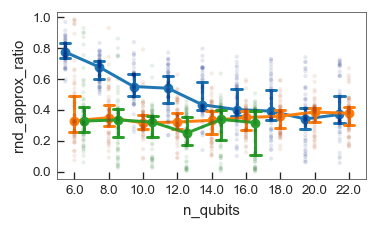

In [434]:
fig, _ = qp.plot_setup()
sns.pointplot(df.query("depth == 4"), x="n_qubits", y="rnd_approx_ratio", hue="method", dodge=.55, legend=False, estimator=np.median, capsize=0.3, errorbar=("pi", 50))
sns.stripplot(df.query("depth == 4"), x="n_qubits", y="rnd_approx_ratio", hue="method", dodge=True, alpha=0.1, legend=False, marker='.', palette="dark", jitter=False)

# plt.yscale("log")
fig.tight_layout()

In [216]:
add_lengths_to_df(df, IntegerKnapsack)

In [308]:
df["adj_clops"] = df.clops / df.p_opt
df["log_adj_clops"] = np.log10(df.adj_clops)

df_fit = fit_multi(df, x="n_qubits", y="log_adj_clops", groupby=["method", "depth"])

df_fit

slope  intercept    rvalue  \
method                                depth                                  
masked_cost_default                   1.0    0.315764   1.232401  0.951898   
                                      2.0    0.339503   0.918383  0.865793   
                                      4.0    0.290191   0.993938  0.794378   
                                      8.0    0.224851   1.346355  0.815311   
                                      16.0   0.141719   2.081970  0.840333   
quad_penalty_cost_masked_cost         1.0    0.317294   0.815344  0.904089   
                                      2.0    0.312753   0.996969  0.848833   
                                      4.0    0.305408   1.111058  0.756465   
                                      8.0    0.260471   1.501513  0.603232   
                                      16.0   0.240577   1.762547  0.514739   
quad_penalty_full_problem_masked_cost 1.0    0.356292   0.647339  0.932213   
                                      2.0    0.369321   0.729666  0.883671   
                                      4.0    0.367004   0.770246  0.809031   
                                      8.0    0.345939   0.926406  0.700417   
                                      16.0   0.330617   1.094133  0.596468   

                                                lower     upper  
method                                depth                      
masked_cost_default                   1.0    0.309945  0.321583  
                                      2.0    0.328545  0.350461  
                                      4.0    0.278087  0.302294  
                                      8.0    0.216078  0.233625  
                                      16.0   0.136655  0.146784  
quad_penalty_cost_masked_cost         1.0    0.308822  0.325766  
                                      2.0    0.301933  0.323573  
                                      4.0    0.291202  0.319614  
                                      8.0    0.243153  0.277789  
                                      16.0   0.221427  0.259726  
quad_penalty_full_problem_masked_cost 1.0    0.346626  0.365957  
                                      2.0    0.355841  0.382801  
                                      4.0    0.349067  0.384942  
                                      8.0    0.323179  0.368699  
                                      16.0   0.303260  0.357974

method                                 depth
masked_cost_default                    16.0     None
quad_penalty_cost_masked_cost          16.0     None
quad_penalty_full_problem_masked_cost  16.0     None
dtype: object

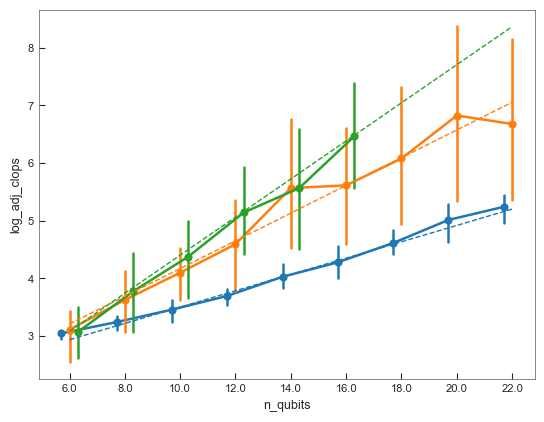

In [298]:
# qp.plot_setup()

sns.pointplot(df.qaoauery("depth==16"), x="n_qubits", y="log_adj_clops", hue="method", dodge=0.3, legend=False, errorbar=("pi",50))
# x = np.arange(6, 24, 2)
# plt.plot(x, (0.2829 + 0.005) * x + 1.04)

# plt.yscale("log")



x = np.linspace(6, 22, 100)
xi = np.linspace(0, (22 - 6) / 2, 100)
def plot_fit(d):
    plt.plot(xi,  d.intercept + d.slope * x, linestyle="--")

df_fit.query("depth == 16").apply(plot_fit, axis=1)

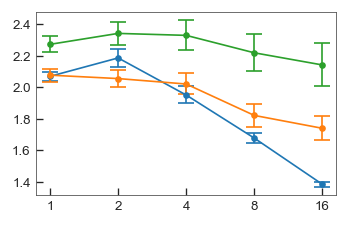

In [238]:
qp.plot_setup()
df_fit["exp_slope"] = np.exp(df_fit.slope)

dfx = df_fit.reset_index()
def plot_method(x):
    bounds = np.abs(np.exp(x[["lower", "upper"]].to_numpy().T) - np.exp(x.slope.to_numpy()[None, :]))
    plt.errorbar(np.arange(len(x.depth)), np.exp(x.slope), yerr=bounds, capsize=5, marker="o")

dfx.groupby("method").apply(plot_m ethod)
_ = plt.xticks(np.arange(len(dfx.depth.drop_duplicates())), dfx.depth.drop_duplicates().astype(int))
# sns.pointplot(df_fit, x="depth", y="slope", hue="method")

,weight_ratio,p_opt,approx_ratio,n_qubits,log_penalty
weight_ratio,1.000000,0.090841,0.588719,-0.019242,-0.178644
p_opt,0.090841,1.000000,0.522118,-0.482439,-0.401240
approx_ratio,0.588719,0.522118,1.000000,-0.161703,-0.594368
n_qubits,-0.019242,-0.482439,-0.161703,1.000000,0.124167
log_penalty,-0.178644,-0.401240,-0.594368,0.124167,1.000000


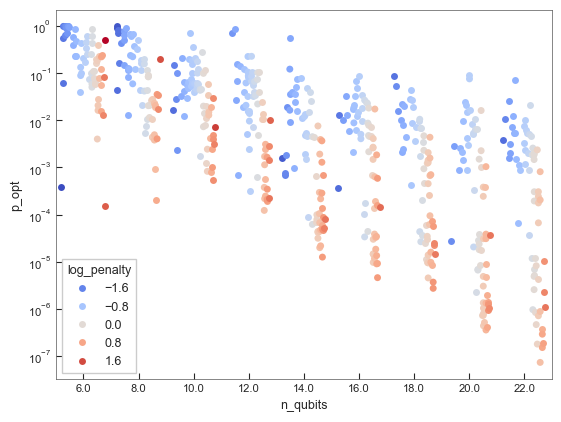

In [233]:
dfx = df[df.qaoa == "quad_penalty_cost"]
dfx = dfx.query("depth == 16")
dfx["log_penalty"] = np.log10(dfx.set_penalty)

sns.stripplot(dfx, x="n_qubits", y="p_opt", hue="log_penalty", palette="coolwarm", dodge=True, jitter=False)
plt.yscale("log")

dfx[["weight_ratio", "p_opt", "approx_ratio", "n_qubits", "log_penalty"]].corr()

In [202]:
instances = IntegerKnapsack.get_instances()[10][:64]

dat = []
for prb in instances:
    r = prb.max_capacity / sum(prb.weights)
    dg = prb.kickback_cost().scale_between_sym()
    dat += [{"id": prb.id, "weight_ratio": r, "value": v} for v in dg.to_numpy()]

In [203]:
df_prb = pd.DataFrame(dat)
df_prb["wrr"] = df.weight_ratio.transform(lambda x: np.round(x, 1))

In [204]:
# sns.histplot(df_prb, x="value", hue="id", alpha=0.1, palette="muted")

In [205]:
dfx.query("set_penalty < 0.02").set_penalty

174     0.007396
399     0.018904
744     0.017751
819     0.018904
1089    0.008264
1179    0.017778
1449    0.016790
1749    0.009452
1899    0.015556
2572    0.015625
4057    0.010417
4767    0.019722
4787    0.015306
5447    0.017600
7267    0.015625
Name: set_penalty, dtype: float64

In [206]:
# interesting instances: 40, 44, 45, 
prb = IntegerKnapsack.get_instances()[16][48]

cost, constr = prb.diagonalized()
norm = np.abs(cost.min_val)
cost = cost / norm

cost_arr = cost.to_numpy()

feas = (constr >= 0).to_numpy()

dfu = pd.DataFrame(np.stack([cost_arr, feas]).T, columns=["v", "c"])

<Axes: xlabel='v', ylabel='Count'>

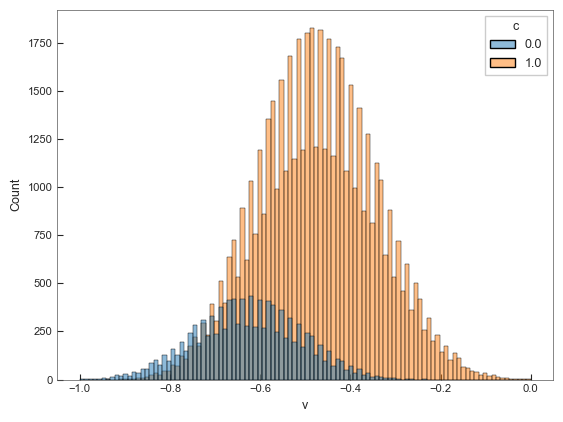

In [207]:
sns.histplot(dfu, x="v", hue="c")
# plt.xlim(-1, -0.8)
# plt.ylim(0, 200)

In [21]:
qpc = prb.quad_penalty_cost() / norm
print(prb._penalty)

dfu2 = pd.DataFrame(np.stack([qpc.to_numpy(), feas]).T, columns=["v", "c"])

0.9999999900000002


<Axes: xlabel='v', ylabel='Count'>

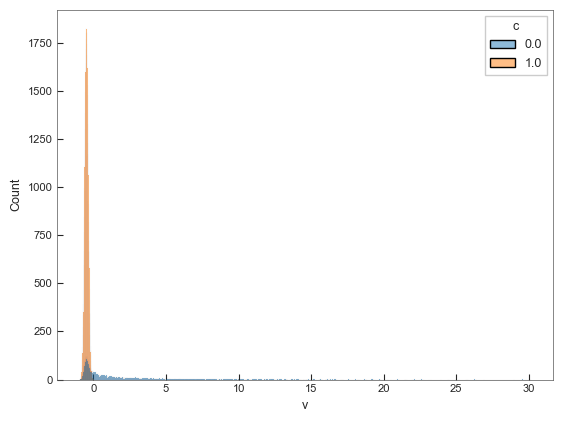

In [22]:
sns.histplot(dfu2, x="v", hue="c")
# plt.xlim(-0.8, -0.6)
# plt.ylim(0, 200)

In [23]:
prb._penalty

0.9999999900000002

In [83]:
df["log_penalty"] = df.set_penalty.transform(lambda x: x if np.isnan(x) else np.log10(x))

In [165]:
df.method

0                      masked_cost_default
1                      masked_cost_default
2                      masked_cost_default
3                      masked_cost_default
4                      masked_cost_default
                       ...                
12558    quad_penalty_full_problem_default
12559    quad_penalty_full_problem_default
12560    quad_penalty_full_problem_default
12561    quad_penalty_full_problem_default
12562    quad_penalty_full_problem_default
Name: method, Length: 7680, dtype: object

## Correlation of instance types

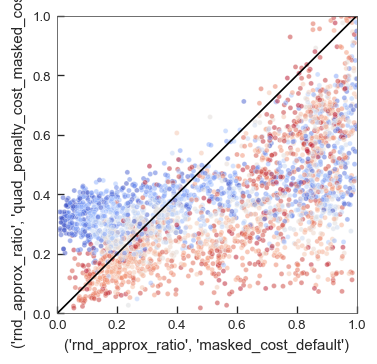

In [208]:
qp.plot_setup(aspect_ratio=1)
dfp = df.pivot(index=["problem_id", "n_qubits", "depth"], columns="method")
# dfp = dfp.query("depth == 16")
# dfp["weight_ratio"] = dfp[("weight_ratio", "masked_cost_default")]
# dfp["set_penalty"] = dfp[("set_penalty", "quad_penalty_cost_default")]
# plt.yscale("log")
# plt.xscale("log")

plt.ylim((0, 1))
plt.xlim((0, 1))

c = "rnd_approx_ratio"
default = lambda x: dfp[(x, "quad_penalty_cost_masked_cost")]
sns.scatterplot(dfp, x=(c, "masked_cost_default"), y=(c, "quad_penalty_cost_masked_cost"), hue=default("weight_ratio"), alpha=0.5, legend=False, palette="coolwarm")
plt.plot([0, 1], [0, 1], color="k")

Text(0, 0.5, 'Penalty RAAR')

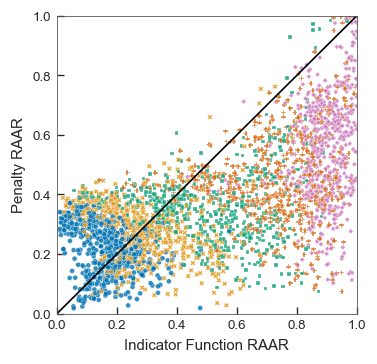

In [210]:
qp.plot_setup(aspect_ratio=1)

c = "rnd_approx_ratio"
default = lambda x: dfp[(x, "quad_penalty_cost_masked_cost")]
sns.scatterplot(dfp, x=(c, "masked_cost_default"), y=(c, "quad_penalty_cost_masked_cost"), hue="depth", style="depth", alpha=0.8, legend=False, palette="colorblind")
plt.plot([0, 1], [0, 1], color="k")

plt.ylim((0, 1))
plt.xlim((0, 1))

plt.xlabel("Indicator Function RAAR")
plt.ylabel("Penalty RAAR")

<Axes: xlabel='depth', ylabel='log_adj_clops'>

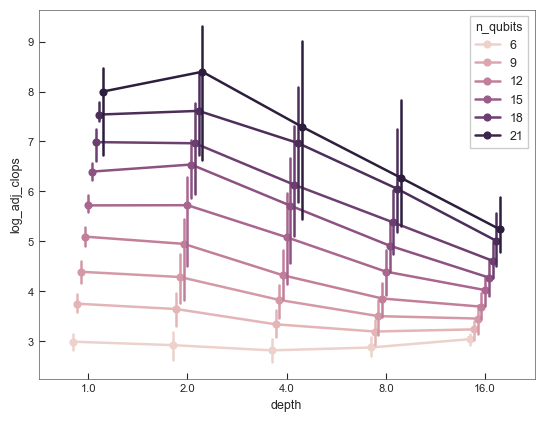

In [304]:
sns.pointplot(df.query("qaoa == 'masked_cost'"), x="depth", y="log_adj_clops", hue="n_qubits", errorbar=("pi", 75), dodge=0.3)

# Deeper optimal scaling analysis

In [413]:
df2 = pd.read_feather("../../results/int_scaling.feather")
df2 = df2.query("qaoa == 'masked_cost'")

In [414]:
add_lengths_to_df(df2, IntegerKnapsack)

In [415]:
df2["adj_clops"] = df2.clops / df2.p_opt
df2["log_adj_clops"] = np.log10(df2.adj_clops)

<Axes: xlabel='depth', ylabel='log_adj_clops'>

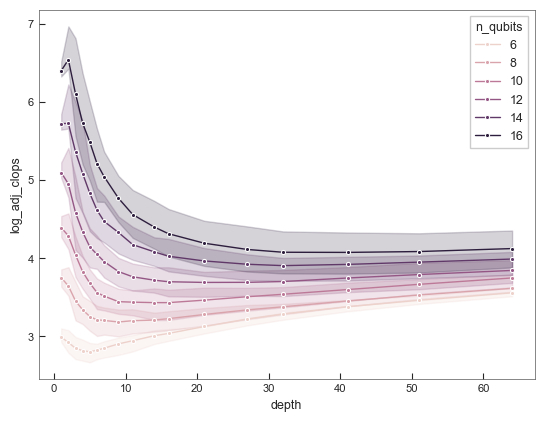

In [430]:
sns.lineplot(df2, x="depth", y="log_adj_clops", hue="n_qubits", errorbar=("pi", 50), marker="o")

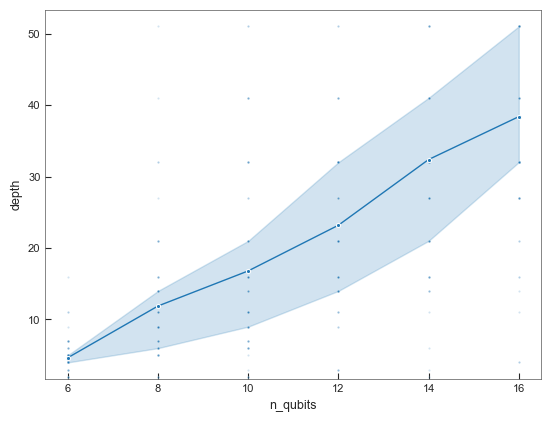

In [429]:
def func(x):
    return x.iloc[x.adj_clops.argmin()]
dfx = df2.groupby(["n_qubits", "problem_id"]).apply(func)

sns.lineplot(dfx, x="n_qubits", y="depth", errorbar=("pi", 50), marker='o')
ylim = plt.gca().get_ylim()
sns.scatterplot(dfx, x="n_qubits", y="depth", alpha=0.2, marker='.')
plt.ylim(ylim)
# plt.xscale("log")

x = np.linspace(0, 64)

# plt.xscale("log")

# plt.plot(x, np.log10(x))


In [409]:
import statsmodels.formula.api as smf

In [ ]:
reg = smf.ols("np.log(adj_clops) ~ np.log(n_qubits)", data=dfx).fit()

reg.summary()

In [425]:
reg = smf.ols("depth ~ n_qubits", data=dfx).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.40e-18
Time:                        15:06:57   Log-Likelihood:                -1558.1
No. Observations:                 384   AIC:                             3120.
Df Residuals:                     382   BIC:                             3128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6371      2.414     -3.577      0.000     -13.384      -3.890
n_qubits       1.9429      0.210      9.269      0.000       1.531       2.355
==============================================================================
Omnibus:                      105.543   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.784
Skew:                           1.450   Prob(JB):                     3.10e-48
Kurtosis:                       5.295   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [420]:
adj_clops2 = df2.groupby(["n_qubits", "depth"])["adj_clops"].mean()

In [424]:
adj_clops2.reset_index().groupby("n_qubits")

,n_qubits,depth,adj_clops
0,6,1,1037.899236
1,6,2,957.523340
2,6,3,805.182154
3,6,4,740.215901
4,6,5,707.302218
...,...,...,...
97,16,27,17642.026780
98,16,32,16289.184765
99,16,41,16524.308144
100,16,51,17144.770150
